In [ ]:
!pip install git+https://github.com/pydata/xarray.git
import xarray as xr
!pip install bambi
import bambi as bmb
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt

# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".



---


**Task1**:

Does elpd_loo mean anything if we only have one model?

Elpd_loo is based on comparing between 2 models, so 1 model won't suffice.



---

**Task2**:

Describe overfitting, in the context of this course

Overfitting is when we let our model get distriacted by unneccesary information. For this course, it's when we use data that would make our conclusion worse.

---
**Task3**:

How do we mitigate overfitting?

We can use weakly informative, or regularizing, priors that do a lot to prevent overfitting. Priors are the main way to help prevent overfitting. Additionally, selecting a model with the smallest number of variables also works to avoid overfitting.


---
**Task4**:

How do we mitigate underfitting?

By selecting a model based on elpd_loo, we can make sure we are doing our best to account for underfitting, helping us be more accurate.

**Task5**:

Why would we want more than one predictor in a model?

Multiple predictors means the model has more information to work with, which means less assumptions and more facts, creating a more accurate model.

---
**Task6**:

Can we have too many predictors? How would we now?

At one point it would convulute the model, be redundant, or lead the model astray, so too many predictors could be a problem. Using elpd_loo, we can compare each model to find the optimal number of predictors.


---
**Task7**:

What is variable selection, and how does it work?


Variable selection is figuring out which predictors are necassary within the model.  You use the following questions when performing variable selection:



* Do we really need multiple predictors?
* If so, how many do we need?
* And which ones? Are some better than others? The same as others?

Run different models favoring different variables and then compare/contrast the results to see how the variables effect the model.



---
**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

* Standard - Categorical variables end up with the same slope.
* Heirarchy - Slope will be different for all the categorical variables.
* Interaction - Each categorical variable is sloped differently.


---
**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

*bmb.interpret.plot_predictions* can be used to visualize LR models, and we can visualize the entire model at once.

---
**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [3]:
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv').dropna()

In [4]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

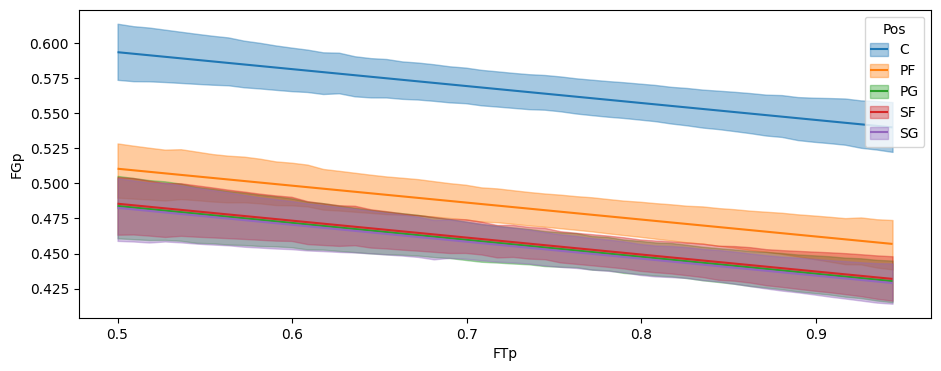

In [5]:
#1
model_basketball = bmb.Model("`FGp` ~ `FTp` + Pos", data=bb)
idata_basketball = model_basketball.fit(idata_kwargs={'log_likelihood': True})
bmb.interpret.plot_predictions(model_basketball,
                               idata_basketball,
                                ["FTp",  "Pos"], fig_kwargs={"figsize":(11, 4)})

Output()

Output()

ERROR:pymc.stats.convergence:There were 19 divergences after tuning. Increase `target_accept` or reparameterize.
/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

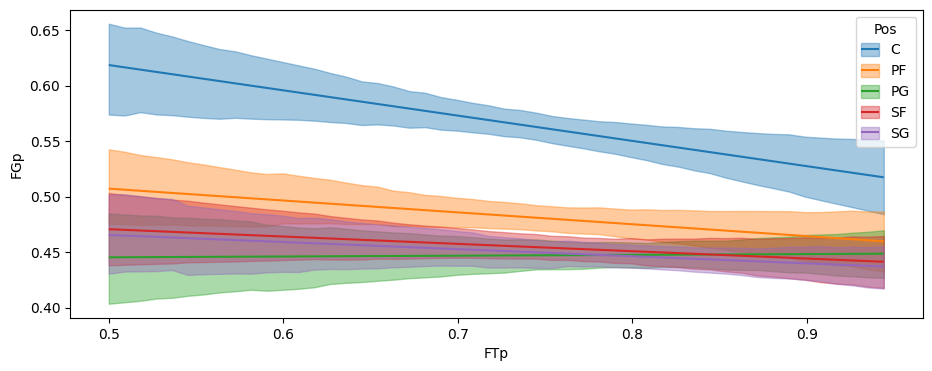

In [6]:
#2
model_basketball_h = bmb.Model("`FGp` ~ (`FTp`|Pos)", data=bb)
idata_basketball_h = model_basketball_h.fit(idata_kwargs={'log_likelihood': True})

bmb.interpret.plot_predictions(model_basketball_h,
                               idata_basketball_h,
                               ["FTp","Pos"],
                               fig_kwargs={"figsize":(11, 4)})

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

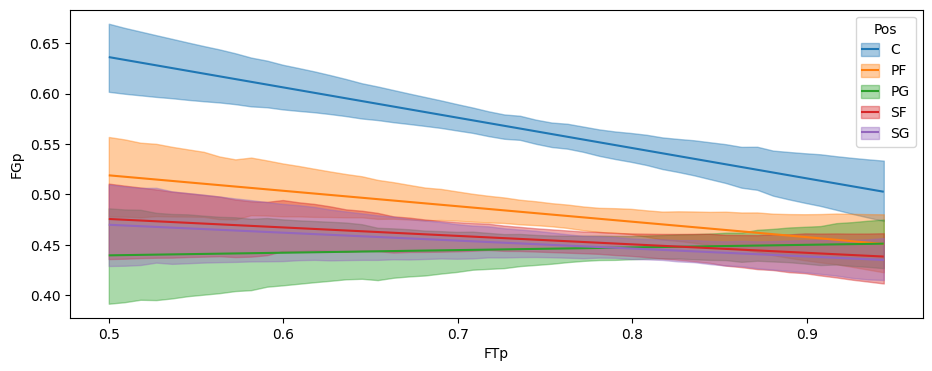

In [7]:
#3
model_inter = bmb.Model("`FGp` ~ `FTp` + Pos + `FTp`:Pos", data=bb)
idata_inter = model_inter.fit(idata_kwargs={'log_likelihood': True})
bmb.interpret.plot_predictions(model_inter,
                               idata_inter,
                               ["FTp","Pos"],
                               fig_kwargs={"figsize":(11, 4)})

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

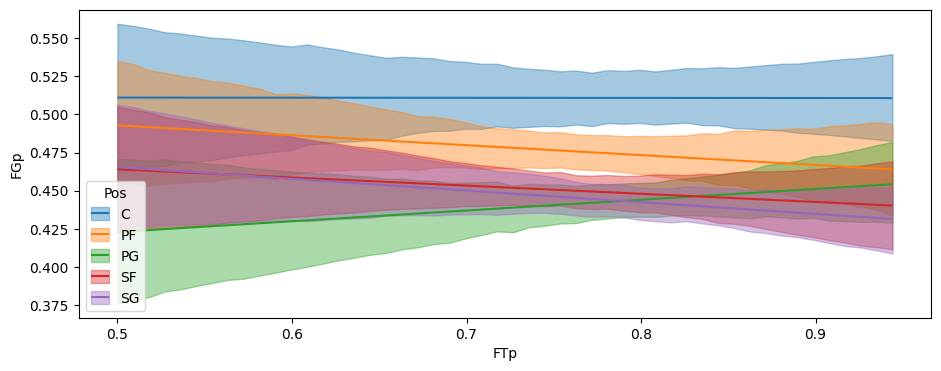

In [12]:
#4
model_3inter = bmb.Model("`FGp` ~ 'FTp' + '3PA' + Pos + 'FTp':Pos + '3PA':Pos +'FTp':'3PA'" , data=bb)
idata_3inter = model_3inter.fit(idata_kwargs={'log_likelihood': True})
bmb.interpret.plot_predictions(model_3inter,
                               idata_3inter,
                               ["FTp","Pos"],
                               fig_kwargs={"figsize":(11, 4)})

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

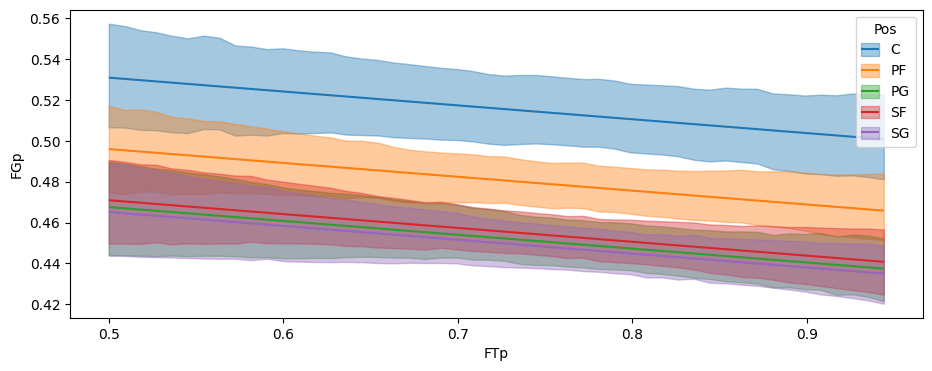

In [14]:
#5
model_3_inter = bmb.Model("`FGp` ~ FTp + Pos + '3PA' +`3PA`:Pos", data=bb)
idata_3_inter = model_3_inter.fit(idata_kwargs={'log_likelihood': True})
bmb.interpret.plot_predictions(model_3_inter,
                               idata_3_inter,
                               ["FTp","Pos"],
                               fig_kwargs={"figsize":(11, 4)})

In [19]:
hello = az.compare({"model1":idata_basketball,"model2":idata_basketball_h, "model3":idata_inter,"model4":idata_3inter,"model5":idata_3_inter})
hello


/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
model5,0,529.779285,12.745417,0.000000,5.841489e-01,15.853500,0.000000,False,log
model4,1,528.726357,19.433606,1.052928,4.158511e-01,15.072686,3.756246,True,log
model3,2,509.376899,13.813623,20.402386,4.061292e-16,16.689340,7.654460,False,log
model2,3,508.599482,13.548833,21.179803,0.000000e+00,16.976667,7.138104,False,log
model1,4,507.134473,8.479733,22.644812,0.000000e+00,16.073473,6.787047,False,log


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

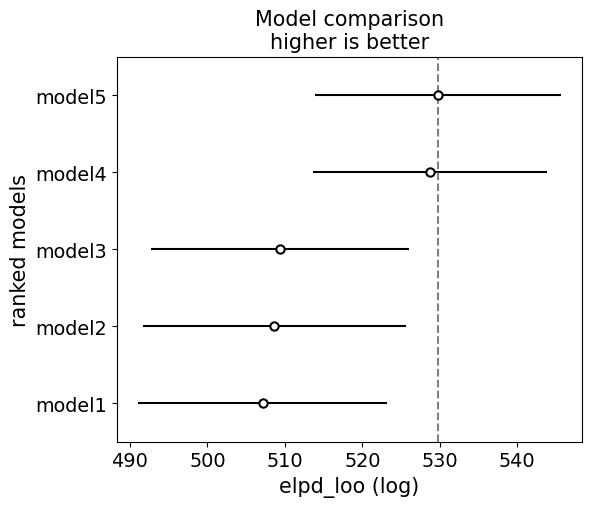

In [21]:
az.plot_compare(hello)

---
**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

The elpd_loo shows us that 5 is the best model, as it returns the highest elpd_loo value. Model 4, however, also has a high elpd_loo so I believe that would work just as well. At the end of the day, all models are fine to be used as they all overlap.

